<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%9C%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv", header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

#데이터 확인 코드
print(df.head())   
print(df.info())  

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [7]:
print(df['horsepower'].unique()) 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [9]:
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [10]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


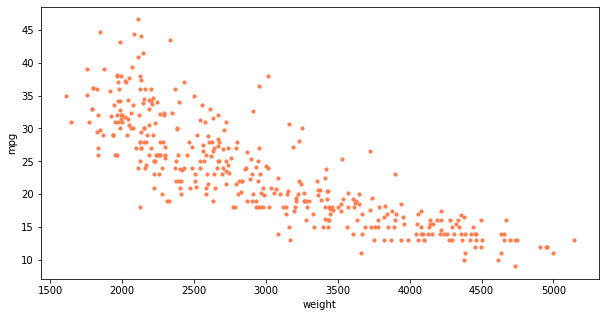

In [11]:
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5)) # 컬러, 점크기
plt.show()
plt.close()

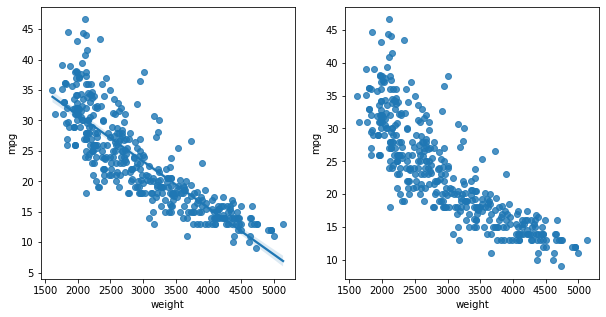

In [12]:
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

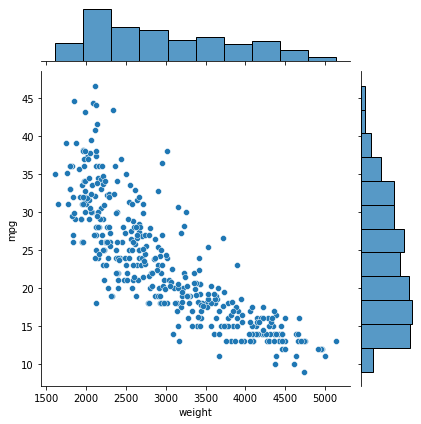

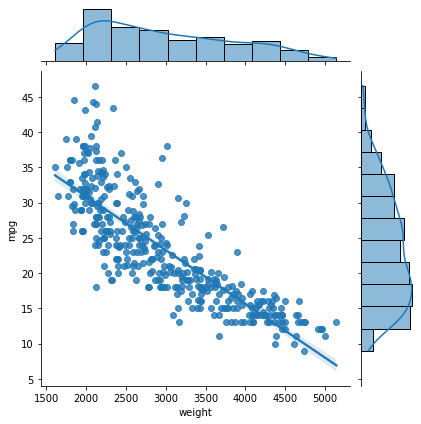

In [13]:
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

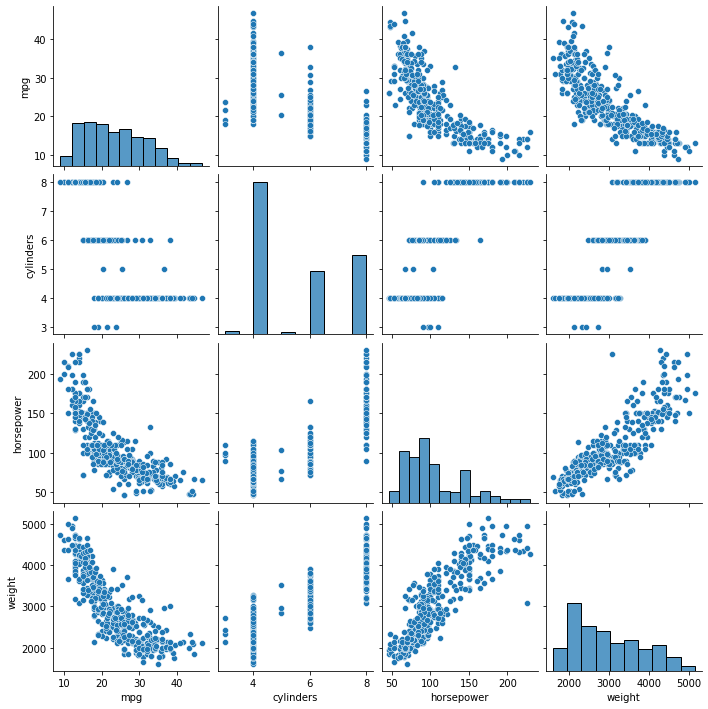

In [14]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
##  info, describe 같은 여러개의 데이터를 한눈에 볼 수 있게 한다.
sns.pairplot(ndf)  
plt.show()
plt.close()

In [15]:
# 속성(변수) 선택
#독립 변수 X => 여러개가 뽑을 수 있으니, 시리즈로 하나하나 뽑아서 들어간다. 
# 어떠한 변수를 넣든 시리즈로 계산되어 나온다.
#즉, 나중에 결과물이 나올 때 weight로 나오는 것인데, 굳이 ndf['weight']를 빼고해도 ndf[['weight']]로 해도 되긴한다.
X=ndf[['weight']]  
y=ndf['mpg']       #종속 변수 Y => 하나
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(type(y))

<class 'pandas.core.series.Series'>


In [17]:
from sklearn.model_selection import train_test_split   # 트레인과 테스트를 알아서 나눠죠
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%   => 트레인 사이트는 70으 된다.
                                                    random_state=10) #랜덤 추출 값 -> 무자기로 10번 섞는다.

In [18]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  

# train data를 가지고 모형 학습  
# 훈련은 fit 함수로 진행한다.   
# fit함수로 모델구축할 때는 test가 아니라 train data로 한다.
lr.fit(X_train, y_train)


# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산 / 결정계수가 높을 수록 성능이 높다.
r_square = lr.score(X_test, y_test)
print(r_square)          # 성능이 얼마나 좋은지?

0.6822458558299322


In [21]:
print('기울기 a: ', lr.coef_)           # Weight를 보자.

기울기 a:  [-0.00775343]


In [22]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)        # 절편을 보자. y절편을 가로질러서 인터셉트

y절편 b 46.7103662572801


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


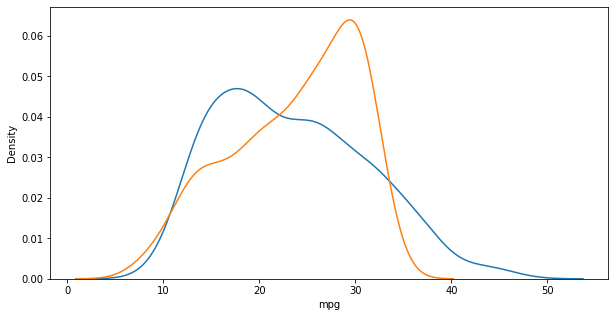

In [23]:
y_hat = lr.predict(X)          # 예측 함수. 예측해서 와이 햇을 구하자.

plt.figure(figsize=(10, 5))    # 2개 그려죠
ax1 = sns.distplot(y, hist=False, label="y")   # 예측모델 넣어서 해죠.
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()

비선형 -> 선형으로는 해결 불가. 예제코드 따라쳐보기.

https://han-py.tistory.com/330#google_vignette